**数据来源:某企业销售的6种商品所对应的送货及用户反馈数据**
<pre>
解决问题:
1、配送服务是否存在问题
2、是否存在尚有潜力的销售区域
3、商品是否存在质量问题


<strong>分析后的结论:</strong>
1、货品4-西北，货品2-马来西亚两条线路存在较大问题，急需提升时效
2、货品2在华东地区还有较大市场空间，适合加太投入，同时货品2在西北配送时效长，用户拒收率高，从成本角度考虑，应该减少投入
3、货品1、2、4质量存在问题，建议扩大抽检范围，增大质检力度
</pre>


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = 'SimHei'

### 数据清洗-预处理

1. 重复值、缺失值、格式调整

In [2]:
df = pd.read_csv('data/data_wuliu.csv', encoding='gbk')
df.info()

'''
通过 info() 可知:
    1、 订单号, 货品交货情况, 数量, 这三者存在缺失值， 但缺失数量不多 可删除
    2、 订单行, 对分析无关紧要, 可删除
    3、 销售金额格式是不对 (object), [万元|元, 逗号问题], 数据类型需要转换成 int|float
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1159 non-null   object 
 1   订单行     1161 non-null   int64  
 2   销售时间    1161 non-null   object 
 3   交货时间    1161 non-null   object 
 4   货品交货状况  1159 non-null   object 
 5   货品      1161 non-null   object 
 6   货品用户反馈  1161 non-null   object 
 7   销售区域    1161 non-null   object 
 8   数量      1157 non-null   float64
 9   销售金额    1161 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 90.8+ KB


'\n通过 info() 可知:\n    1、 订单号, 货品交货情况, 数量, 这三者存在缺失值， 但缺失数量不多 可删除\n    2、 订单行, 对分析无关紧要, 可删除\n    3、 销售金额格式是不对 (object), [万元|元, 逗号问题], 数据类型需要转换成 int|float\n'

In [3]:
# 重复值
duplicate_row = df.duplicated()
num_duplicates = duplicate_row.sum()
print(num_duplicates)

df.drop_duplicates(inplace=True)
df.info()

9
<class 'pandas.core.frame.DataFrame'>
Index: 1152 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1150 non-null   object 
 1   订单行     1152 non-null   int64  
 2   销售时间    1152 non-null   object 
 3   交货时间    1152 non-null   object 
 4   货品交货状况  1150 non-null   object 
 5   货品      1152 non-null   object 
 6   货品用户反馈  1152 non-null   object 
 7   销售区域    1152 non-null   object 
 8   数量      1150 non-null   float64
 9   销售金额    1152 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 99.0+ KB


In [4]:
# 缺失值
df.dropna(axis=0, how='any', inplace=True )     # 删除带有na的整行数据
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1146 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1146 non-null   object 
 1   订单行     1146 non-null   int64  
 2   销售时间    1146 non-null   object 
 3   交货时间    1146 non-null   object 
 4   货品交货状况  1146 non-null   object 
 5   货品      1146 non-null   object 
 6   货品用户反馈  1146 non-null   object 
 7   销售区域    1146 non-null   object 
 8   数量      1146 non-null   float64
 9   销售金额    1146 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 98.5+ KB


In [5]:
df.drop(['订单行'], axis=1, inplace=True)   # 【重复运行会报错，第一次运行就已经删除了这一列】
print(df.shape)
df

(1146, 9)


,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,"1052,75元"
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,"11,50万元"
3,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,"6858,77元"
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,"129,58元"
5,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,"32,39元"
...,...,...,...,...,...,...,...,...,...
1156,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,"200,41元"
1157,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,"79,44元"
1158,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,"194,08元"
1159,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,"32,18元"


In [6]:
# 更新索引
df.reset_index(drop=True, inplace=True)
df

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,"1052,75元"
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,"11,50万元"
2,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,"6858,77元"
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,"129,58元"
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,"32,39元"
...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,"200,41元"
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,"79,44元"
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,"194,08元"
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,"32,18元"


In [7]:
# 修改销售金额格式, 对每一个数据进行清洗

# 自定义函数: 删除‘，’， 转成 float, 如果是万元 则 * 10000， 否则，删除元
def data_clean(x):
    # #找到带有万元的，取出数字，去掉逗号，转成float，*10000
    # find() 方法会返回子字符串的索引，如果找不到子字符串，则返回 -1。
    if x.find('万元') != -1:
        new_number = float(x[:x.find('万元')].replace(',', '')) * 10000
        # x.find('万元') 找到 '万元' 的索引位置，然后使用切片操作 x[:x.find('万元')] 获取 '万元' 之前的部分。
    else:
        new_number = float(x.replace('元', '').replace(',', ''))
    return new_number

df['销售金额'] = df['销售金额'].map(data_clean)
df

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0
2,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0
...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,20041.0
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,7944.0
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,19408.0
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,3218.0


2. 异常值、偏态分布

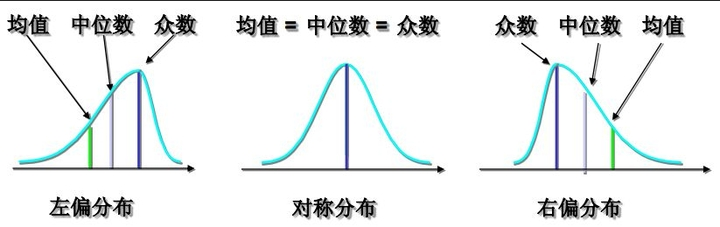

In [8]:
df.describe()


,数量,销售金额
count,1146.000000,1.146000e+03
mean,76.069372,1.223488e+05
std,589.416486,1.114599e+06
min,1.000000,0.000000e+00
25%,1.000000,2.941500e+03
50%,1.000000,9.476500e+03
75%,4.000000,3.576775e+04
max,11500.000000,3.270000e+07


In [9]:
# 1. 销售金额=0，采用删除方法，因为数据量很小
df = df[df['销售金额']!=0]
df.describe()

# 2. 销售金额和数量存在严重右偏现象， 在电商领域 2/8 很正常， 无需处理


,数量,销售金额
count,1145.000000,1.145000e+03
mean,76.134934,1.224557e+05
std,589.669861,1.115081e+06
min,1.000000,5.100000e+01
25%,1.000000,2.946000e+03
50%,1.000000,9.486000e+03
75%,4.000000,3.577300e+04
max,11500.000000,3.270000e+07


在数据分析中，偏态问题是指数据分布的偏斜程度，即数据集中在一个或者两个方向上的不平衡性。通常，数据分布可能是正偏态（右偏态）或负偏态（左偏态）。

针对不同的偏态问题，可以采取不同的处理方法：

1. **对数转换（Log Transformation）**：对数转换是常用的方法之一，特别适用于右偏态分布的数据。通过取对数，可以压缩大值的范围，同时扩展小值的范围，使得数据更接近正态分布。

2. **Box-Cox 转换**：Box-Cox 转换是一种广义幂函数转换方法，可以对不同类型的偏态分布进行转换，使其接近于正态分布。

3. **指数转换**：指数转换可以降低左偏态分布的尾部厚度，使得数据更加接近正态分布。

4. **截尾或者截断**：可以对数据进行截尾或者截断操作，去除极端值或者将超出一定范围的值设置为特定的阈值，从而减少偏态的影响。

5. **使用偏态稳定的统计方法**：某些统计方法对偏态数据比较敏感，因此可以选择使用一些偏态稳定的统计方法，如中位数、百分位数等，而不是均值和方差等。

6. **数据分箱（Binning）**：将连续型数据分箱成离散的分类变量，可以减轻偏态分布的影响，提高建模的鲁棒性。

7. **使用非参数统计方法**：非参数统计方法不依赖于数据的分布假设，因此可以在偏态数据上表现更好。

8. **重采样**：通过重采样技术（如自助法Bootstrap）可以生成新的数据集，从而减少偏态的影响，使得建模更加稳健。

在选择处理方法时，需要根据数据的特点、分布情况以及分析目的进行综合考虑和选择。

3. 数据规整: 增加一项辅助列: 月份


In [10]:
df['销售时间'] = pd.to_datetime(df['销售时间'])
df['month'] = df['销售时间'].apply(lambda x:x.month)
df

C:\Users\Rainbow\AppData\Local\Temp\ipykernel_6564\2509804987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['销售时间'] = pd.to_datetime(df['销售时间'])
C:\Users\Rainbow\AppData\Local\Temp\ipykernel_6564\2509804987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['销售时间'].apply(lambda x:x.month)


,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额,month
0,P096311,2016-07-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0,7
1,P096826,2016-08-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0,8
2,P097435,2016-07-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0,7
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0,11
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0,11
...,...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,20041.0,12
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,7944.0,12
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,19408.0,12
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,3218.0,12


### 数据分析


1、 配送服务是否存在问题

    a. 月份维度

In [11]:
df['货品交货状况'] = df['货品交货状况'].str.strip()
df1 = df.groupby(['month', '货品交货状况']).size().unstack()
# unstack() 方法将数据层级转换为行级，并将数据转换为 DataFrame 对象。
# size() 函数计算每个分组的大小（即每个组内的行数）。

df1['按时交货率'] = df1['按时交货']/(df1['按时交货']+df1['晚交货'])
df1


# 从按时交货率来看，第四季度低于第三季度，猜测可能是气候原因造成

C:\Users\Rainbow\AppData\Local\Temp\ipykernel_6564\871812850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['货品交货状况'] = df['货品交货状况'].str.strip()


货品交货状况,按时交货,晚交货,按时交货率
month,,,
7,189,13,0.935644
8,218,35,0.861660
9,122,9,0.931298
10,238,31,0.884758
11,101,25,0.801587
12,146,18,0.890244


    b. 销售区域维度

In [12]:
df1 = df.groupby(['销售区域', '货品交货状况']).size().unstack()
# unstack() 方法将数据层级转换为行级，并将数据转换为 DataFrame 对象。
df1['按时交货率'] = df1['按时交货']/(df1['按时交货']+df1['晚交货'])

df1.sort_values(by='按时交货率', ascending=False)


# 西北地区存在突出的延时交货问题， 急需解决

货品交货状况,按时交货,晚交货,按时交货率
销售区域,,,
泰国,183,4,0.978610
马来西亚,310,16,0.950920
华南,10,1,0.909091
华北,226,27,0.893281
华东,268,39,0.872964
西北,17,44,0.278689


    c. 货品维度

In [13]:
df1 = df.groupby(['货品', '货品交货状况']).size().unstack()
# unstack() 方法将数据层级转换为行级，并将数据转换为 DataFrame 对象。
df1['按时交货率'] = df1['按时交货']/(df1['按时交货']+df1['晚交货'])

df1.sort_values(by='按时交货率', ascending=False)


# 货品4 晚交货情况非常严重, 其余货物相对交货

货品交货状况,按时交货,晚交货,按时交货率
货品,,,
货品5,183,4,0.978610
货品6,309,7,0.977848
货品1,27,2,0.931034
货品3,212,26,0.890756
货品2,269,48,0.848580
货品4,14,44,0.241379


    d. 货品和销售区域结合

In [14]:
df1 = df.groupby(['货品', '销售区域','货品交货状况']).size().unstack()
# unstack() 方法将数据层级转换为行级，并将数据转换为 DataFrame 对象。
df1['按时交货率'] = df1['按时交货']/(df1['按时交货']+df1['晚交货'])

df1.sort_values(by='按时交货率', ascending=False)



# 销售区域:最差在西北地区, 货品有1和4, 主要是货品4送过较晚导致
# 货品:最差的货品2, 主要送往华东和马来西亚, 主要是马来西亚的送货较晚导致


货品交货状况     按时交货   晚交货     按时交货率
货品  销售区域                       
货品5 泰国    183.0   4.0  0.978610
货品6 马来西亚  309.0   7.0  0.977848
货品1 华北     14.0   1.0  0.933333
    华南     10.0   1.0  0.909091
货品3 华北    212.0  26.0  0.890756
货品2 华东    268.0  39.0  0.872964
货品4 西北     14.0  44.0  0.241379
货品2 马来西亚    1.0   9.0  0.100000
货品1 西北      3.0   NaN       NaN

2、 销售区域潜力分析

    a. 月份维度

<Axes: xlabel='month'>

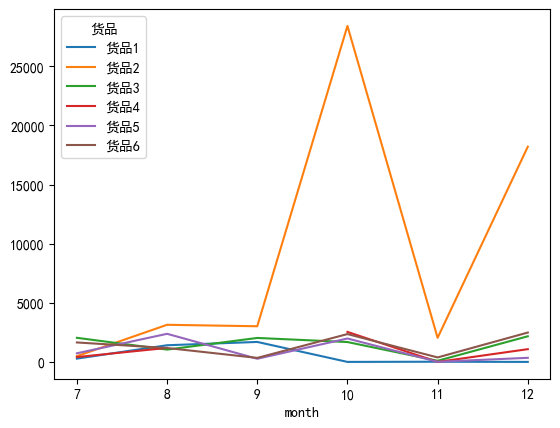

In [15]:
df2 =  df.groupby(['month', '货品'])['数量'].sum().unstack()
df2.plot(kind='line')


# 货品2 在 10月 和 12月, 销量猛增, 
#     原因猜测有二: 
#         1.公司加大营销力度 
#         2.开发了新的市场(后续有结论 c)


    b.不同区域

In [16]:
df2 =  df.groupby(['销售区域', '货品'])['数量'].sum().unstack()
df2


# 从销售区域看, 每种货品销售区域为1~3个, 货品1有三个销售区域, 货品2有两个销售区域, 其余货品均有1个销售区域


货品,货品1,货品2,货品3,货品4,货品5,货品6
销售区域,,,,,,
华东,NaN,53811.0,NaN,NaN,NaN,NaN
华北,2827.0,NaN,9073.5,NaN,NaN,NaN
华南,579.0,NaN,NaN,NaN,NaN,NaN
泰国,NaN,NaN,NaN,NaN,5733.0,NaN
西北,11.0,NaN,NaN,5229.0,NaN,NaN
马来西亚,NaN,1510.0,NaN,NaN,NaN,8401.0


    c. 月份和区域

In [17]:
df2 =  df.groupby(['month','销售区域', '货品'])['数量'].sum().unstack()
df2


# 货品2在10, 12月份销量猛增, 原因主要发生在原有销售区域(华东)
# 同样, 分析出在7, 8, 9, 11月份销售数量还有很大提升空间, 可以适当加大营销力度


货品             货品1      货品2     货品3     货品4     货品5     货品6
month 销售区域                                                 
7     华东       NaN    489.0     NaN     NaN     NaN     NaN
      华北       1.0      NaN  2041.5     NaN     NaN     NaN
      华南     282.0      NaN     NaN     NaN     NaN     NaN
      泰国       NaN      NaN     NaN     NaN   733.0     NaN
      西北       NaN      NaN     NaN   414.0     NaN     NaN
      马来西亚     NaN      2.0     NaN     NaN     NaN  1649.0
8     华东       NaN   1640.0     NaN     NaN     NaN     NaN
      华北    1410.0      NaN  1045.0     NaN     NaN     NaN
      华南       3.0      NaN     NaN     NaN     NaN     NaN
      泰国       NaN      NaN     NaN     NaN  2381.0     NaN
      西北       NaN      NaN     NaN  1188.0     NaN     NaN
      马来西亚     NaN   1503.0     NaN     NaN     NaN  1181.0
9     华东       NaN   3019.0     NaN     NaN     NaN     NaN
      华北    1409.0      NaN  2031.0     NaN     NaN     NaN
      华南     283.0      NaN     NaN     NaN     NaN     NaN
      泰国       NaN      NaN     NaN     NaN   271.0     NaN
      西北       1.0      NaN     NaN     NaN     NaN     NaN
      马来西亚     NaN      1.0     NaN     NaN     NaN   343.0
10    华东       NaN  28420.0     NaN     NaN     NaN     NaN
      华北       3.0      NaN  1684.0     NaN     NaN     NaN
      泰国       NaN      NaN     NaN     NaN  1984.0     NaN
      西北       1.0      NaN     NaN  2542.0     NaN     NaN
      马来西亚     NaN      NaN     NaN     NaN     NaN  2358.0
11    华东       NaN   2041.0     NaN     NaN     NaN     NaN
      华北       2.0      NaN   100.0     NaN     NaN     NaN
      华南       9.0      NaN     NaN     NaN     NaN     NaN
      泰国       NaN      NaN     NaN     NaN    14.0     NaN
      西北       9.0      NaN     NaN     3.0     NaN     NaN
      马来西亚     NaN      1.0     NaN     NaN     NaN   383.0
12    华东       NaN  18202.0     NaN     NaN     NaN     NaN
      华北       2.0      NaN  2172.0     NaN     NaN     NaN
      华南       2.0      NaN     NaN     NaN     NaN     NaN
      泰国       NaN      NaN     NaN     NaN   350.0     NaN
      西北       NaN      NaN     NaN  1082.0     NaN     NaN
      马来西亚     NaN      3.0     NaN     NaN     NaN  2487.0

3、 商品质量分析

In [18]:
df['货品用户反馈'] = df['货品用户反馈'].str.strip() # 去除首尾空格
df3 = df.groupby(['货品', '销售区域'])['货品用户反馈'].value_counts().unstack()

df3['拒货率'] = df3['拒货']/df3.sum(axis=1)
df3['返修率'] = df3['返修']/df3.sum(axis=1)
df3['合格率'] = df3['质量合格']/df3.sum(axis=1)

df3.sort_values(['合格率', '返修率', '拒货率'], ascending=False)


# 货品3, 6, 5合格率均较高, 返修率比较低, 说明质量还可以
# 货品1, 2, 4合格率较低, 返修率较高, 质量存在一定的问题, 需要改善
# 货品2 在马来西亚拒货率最高 再结合上面分析的货物2 在马来西亚的按时交货率也非常低。 

# 猜测：马来西亚人对送货的时效性要求较高， 如果无法按时交货, 则往往考虑拒货.

# 考虑到货品2主要在华东地区销售量大, 可以考虑增大在华东的投资, 适当减少在马来西亚的投入。


C:\Users\Rainbow\AppData\Local\Temp\ipykernel_6564\1443045079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['货品用户反馈'] = df['货品用户反馈'].str.strip() # 去除首尾空格


货品用户反馈      拒货   质量合格    返修       拒货率       返修率       合格率
货品  销售区域                                                 
货品3 华北    31.0  188.0  19.0  0.130252  0.079788  0.789219
货品6 马来西亚  56.0  246.0  14.0  0.177215  0.044279  0.777936
货品5 泰国    14.0  144.0  29.0  0.074866  0.155018  0.769108
货品2 华东    72.0  184.0  51.0  0.234528  0.165997  0.598568
货品1 华南     5.0    4.0   2.0  0.454545  0.174603  0.343963
    西北     NaN    1.0   2.0       NaN  0.666667  0.272727
    华北     NaN    3.0  12.0       NaN  0.800000  0.189873
货品4 西北     NaN    9.0  49.0       NaN  0.844828  0.152945
货品2 马来西亚   6.0    1.0   3.0  0.600000  0.283019  0.091886